# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

api_key = os.getenv("ALPACA_API_KEY")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc = requests.get(btc_url).json()
btc_price = response_btc['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
response_eth = requests.get(eth_url).json()
eth_price = response_eth['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45203.82
The current value of your 5.3 ETH is $13417.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url='https://paper-api.alpaca.markets',
    api_version='v2'
)

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Format current date as ISO format
today = pd.Timestamp('2023-04-17', tz='America/New_York').isoformat()

# Get current closing prices for SPY and AGG
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=today
).df



ticker_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-04-17 04:00:00+00:00,99.13,99.175,98.88,98.90,4441277,18511,98.944350,AGG
2023-04-18 04:00:00+00:00,98.91,99.160,98.91,99.04,4753038,17653,99.022777,AGG
2023-04-19 04:00:00+00:00,98.89,98.930,98.71,98.89,3592906,18630,98.843915,AGG
2023-04-20 04:00:00+00:00,99.21,99.360,99.19,99.34,5092430,18730,99.286706,AGG
2023-04-21 04:00:00+00:00,99.51,99.560,99.11,99.17,5294282,19339,99.198584,AGG


In [8]:
# Reorganize the DataFrame
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
AGG

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2023-04-17 04:00:00+00:00,99.13,99.175,98.88,98.90,4441277,18511,98.944350
2023-04-18 04:00:00+00:00,98.91,99.160,98.91,99.04,4753038,17653,99.022777
2023-04-19 04:00:00+00:00,98.89,98.930,98.71,98.89,3592906,18630,98.843915
2023-04-20 04:00:00+00:00,99.21,99.360,99.19,99.34,5092430,18730,99.286706
2023-04-21 04:00:00+00:00,99.51,99.560,99.11,99.17,5294282,19339,99.198584


In [9]:
# Reorganize the DataFrame
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
SPY

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2023-04-17 04:00:00+00:00,412.37,413.96,411.0850,413.94,66447057,478342,412.589811
2023-04-18 04:00:00+00:00,415.58,415.72,412.7802,414.21,63567329,493414,414.073765
2023-04-19 04:00:00+00:00,412.22,415.08,412.1600,414.14,55252464,421201,413.662834
2023-04-20 04:00:00+00:00,411.21,413.70,410.2700,411.88,75839327,546265,412.016996
2023-04-21 04:00:00+00:00,412.19,412.68,410.1700,412.20,72023892,468905,411.767653


In [10]:
df_combined = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY']) 
df_combined.index = df_combined.index.date
df_combined

AGG                                                        \
             open    high    low  close   volume trade_count       vwap   
2023-04-17  99.13  99.175  98.88  98.90  4441277       18511  98.944350   
2023-04-18  98.91  99.160  98.91  99.04  4753038       17653  99.022777   
2023-04-19  98.89  98.930  98.71  98.89  3592906       18630  98.843915   
2023-04-20  99.21  99.360  99.19  99.34  5092430       18730  99.286706   
2023-04-21  99.51  99.560  99.11  99.17  5294282       19339  99.198584   

               SPY                                                              
              open    high       low   close    volume trade_count        vwap  
2023-04-17  412.37  413.96  411.0850  413.94  66447057      478342  412.589811  
2023-04-18  415.58  415.72  412.7802  414.21  63567329      493414  414.073765  
2023-04-19  412.22  415.08  412.1600  414.14  55252464      421201  413.662834  
2023-04-20  411.21  413.70  410.2700  411.88  75839327      546265  412.016996  
2023-04-21  412.19  412.68  410.1700  412.20  72023892      468905  411.767653

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_combined['AGG']['close'][0]
spy_close_price = df_combined['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.9
Current SPY closing price: $413.94


In [12]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20697.00
The current value of your 200 AGG shares is $19780.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
savings_data = {'amount': [crypto, shares]}


# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,58621.108975
shares,40477.000000


<AxesSubplot:ylabel='amount'>

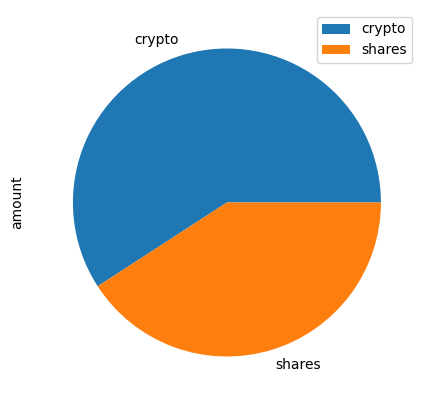

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', figsize=(5,5))


In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough savings for an emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal for the emergency fund.")
else:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from your goal for the emergency fund. Keep saving!")

Congratulations! You have enough savings for an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG

# Define the ticker symbols
tickers = ["SPY","AGG"]

# Define the timeframe
timeframe = '1D'

# Get historical data for the tickers
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-04-26 04:00:00+00:00,417.44,418.22,416.8111,417.61,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.93,418.14,416.3000,417.52,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.81,419.01,416.9000,417.40,50692781,330049,417.742098,SPY
2021-04-29 04:00:00+00:00,420.32,420.72,416.4400,420.06,76965583,443396,418.824046,SPY
2021-04-30 04:00:00+00:00,417.63,418.54,416.3400,417.30,84731942,478844,417.651995,SPY


In [18]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [21]:
import warnings
warnings.filterwarnings("ignore", message="DataFrame is highly fragmented.")

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998932,1.002852,0.994096,1.008905,0.988560,0.988306,0.997839,0.991040,0.996696,1.012188,...,0.998829,0.999261,0.990373,0.999119,0.996829,0.999219,0.999125,1.003969,1.001719,0.996706
2,0.989820,1.003101,0.997157,1.007205,0.995726,0.990684,0.997038,0.998302,0.994023,1.010914,...,0.997873,0.999132,0.988250,1.004819,0.991674,0.996728,0.992847,1.004103,0.999760,1.000161
3,0.979895,0.995993,0.986691,1.003490,0.997768,0.977001,0.993196,0.999648,0.996049,1.010471,...,0.999436,0.997607,0.979038,0.999420,0.993014,0.995867,0.984297,0.995895,0.995197,1.006135
4,0.977363,0.993906,0.979304,0.998690,0.992814,0.980879,0.989255,0.993338,0.989831,1.008156,...,1.002555,1.002703,0.982908,1.010822,0.988780,1.004883,0.975850,1.003312,1.008067,1.002853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.860030,39.903927,20.220431,18.020588,15.968616,10.127750,16.353982,17.152969,16.115758,11.592204,...,40.604952,12.200222,23.608129,5.082745,12.169761,10.153142,36.004921,14.767905,7.070018,9.995939
7557,22.920740,39.415977,20.206535,17.870478,15.948973,10.087696,16.432923,17.018059,16.148724,11.590041,...,40.688733,12.094153,23.372802,5.099758,12.239111,10.208983,35.411918,14.671319,7.115076,9.989379
7558,23.241128,39.307225,20.148243,17.785553,15.915861,10.046284,16.444120,17.108587,16.032240,11.567899,...,40.950487,12.214136,23.066645,5.074458,12.317036,10.192427,35.654292,14.496011,7.156872,10.025494
7559,23.355296,39.577494,20.104929,17.514527,15.889906,10.053153,16.518784,17.048839,15.994323,11.649169,...,41.207139,12.329651,22.977899,5.066150,12.388644,10.307415,35.839072,14.563138,7.186117,10.159503


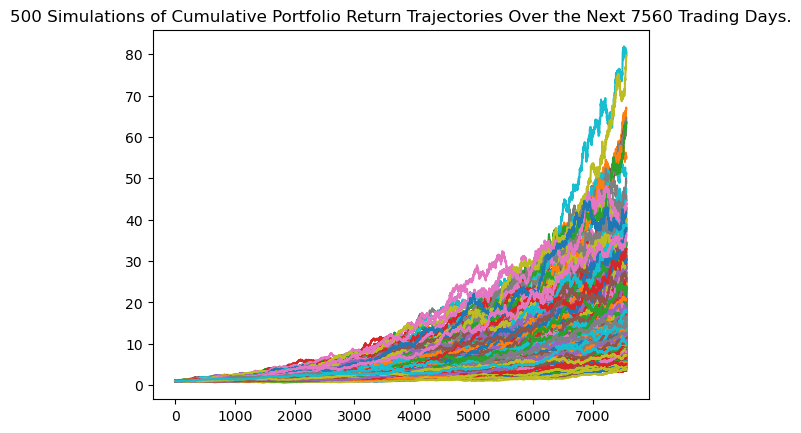

In [23]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

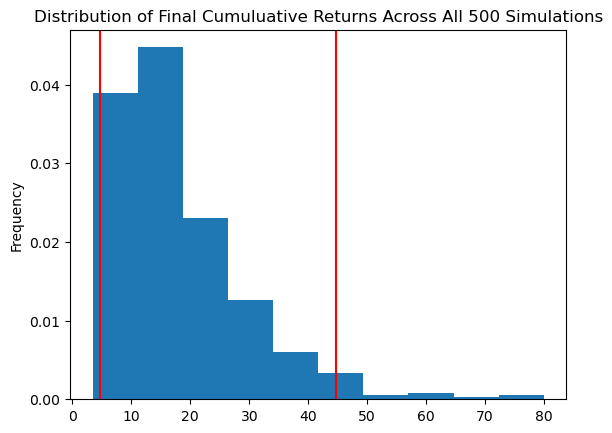

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [25]:
import warnings
warnings.filterwarnings("ignore", message="The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.")

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.927283
std              11.394200
min               3.461443
25%              10.102774
50%              15.001430
75%              23.107890
max              79.916332
95% CI Lower      4.624547
95% CI Upper     44.733895
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92490.95 and $894677.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Calculate the expected portfolio return at the 95% lower and upper confidence intervals
expected_return_lower = round(tbl[0]*initial_investment, 2)
expected_return_upper = round(tbl[1]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138736.42 and $1342016.84


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999210,1.004682,1.004076,1.010356,0.996442,1.006083,1.008329,1.007253,0.988018,1.009869,...,1.006289,1.008872,1.008723,1.007984,1.005112,1.006816,0.991975,0.996433,1.003167,0.996325
2,0.989433,1.002278,1.007973,1.011956,0.982218,1.010863,1.014897,1.013233,0.985958,1.030039,...,1.002388,1.010685,1.012234,1.009998,0.995976,1.009770,0.989972,0.999745,0.996175,0.984974
3,0.996482,1.009610,1.016645,1.013276,0.987080,1.015870,1.026894,1.003012,0.988633,1.033588,...,0.998198,1.025447,1.005764,1.011485,1.004413,1.004779,0.988236,1.002289,0.999955,0.982740
4,0.996171,1.008259,1.013699,1.012180,0.995382,1.022532,1.025756,1.009373,0.981302,1.035735,...,0.997053,1.015073,1.003214,0.996449,1.000751,1.014149,0.994003,1.016784,0.991226,0.973260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.519632,1.700698,2.776382,1.761139,1.382600,1.445166,1.984788,1.673152,1.940791,2.049522,...,2.277690,1.318874,1.425319,2.111348,1.500128,1.432977,1.347332,1.843643,1.022212,2.480291
1257,1.521870,1.698822,2.828317,1.778933,1.388296,1.444409,1.988159,1.667016,1.942088,2.080384,...,2.254839,1.298967,1.424018,2.126774,1.496057,1.427937,1.339181,1.843426,1.018949,2.471888
1258,1.533890,1.705017,2.823849,1.771982,1.401120,1.442768,1.992190,1.652013,1.950891,2.072286,...,2.262304,1.290600,1.415883,2.113907,1.499565,1.429719,1.330457,1.829691,1.020387,2.458248
1259,1.548205,1.682785,2.842095,1.768457,1.403667,1.427610,1.977467,1.651085,1.961112,2.080387,...,2.243017,1.296632,1.424494,2.118189,1.519481,1.429865,1.319745,1.831497,1.017673,2.443142


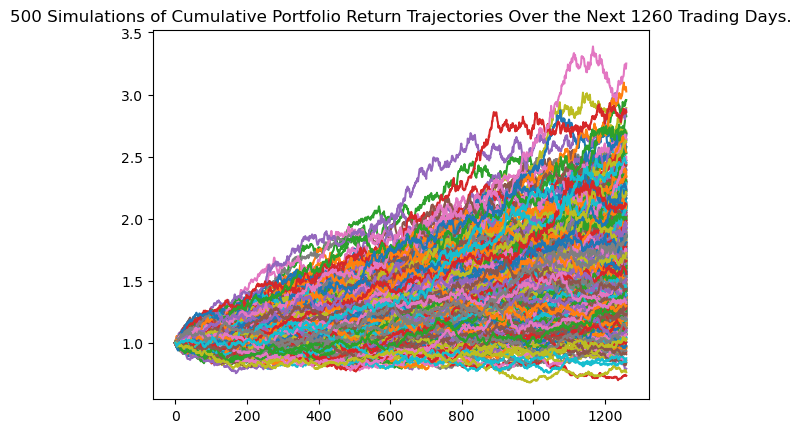

In [31]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

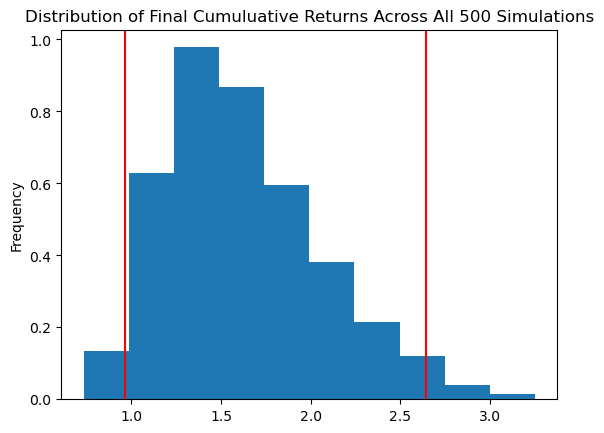

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.625026
std               0.434813
min               0.734970
25%               1.305853
50%               1.555761
75%               1.877481
max               3.249513
95% CI Lower      0.962040
95% CI Upper      2.640367
Name: 1260, dtype: float64


In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Set initial investment
initial_investment = 60000

# Calculate the lower and upper `95%` confidence intervals based on the initial investment
MC_fiveyear_lower_ci = tbl[8] * initial_investment
MC_fiveyear_upper_ci = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${round(MC_fiveyear_lower_ci, 2)} and ${round(MC_fiveyear_upper_ci, 2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57722.41 and $158421.99


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003564,0.989701,0.995313,0.994410,1.010716,1.006778,1.008469,1.009487,1.002837,1.005383,...,1.010636,1.008612,1.010177,0.996180,1.003955,0.987503,1.000413,1.010548,0.997113,0.999295
2,0.996909,1.000268,1.011308,0.989554,1.014231,1.009904,1.008748,1.009323,0.991302,1.010357,...,1.006941,1.024643,1.005146,0.997479,1.005697,0.989469,0.993857,1.027160,1.001692,0.999972
3,0.988884,1.001551,1.003325,0.990229,1.000176,1.013622,1.017333,1.005522,0.980072,1.005129,...,1.014269,1.035063,1.014181,0.991418,1.010393,0.990078,0.993251,1.029045,1.008023,1.000472
4,0.997419,1.001620,1.001630,0.982006,0.997044,1.026208,1.016532,1.001045,0.974692,1.006746,...,1.003884,1.036342,1.012407,0.987227,0.999712,0.997600,0.986310,1.018750,1.004459,1.003050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.685360,1.864312,4.299431,2.519523,1.975017,3.513901,4.256329,3.637541,2.111680,3.794146,...,1.112883,2.249176,2.369260,2.634585,4.456946,2.553284,1.910483,3.312633,1.789962,5.821202
2517,1.660249,1.852211,4.382883,2.502843,1.942300,3.521360,4.248680,3.652879,2.120473,3.758124,...,1.114935,2.252051,2.346843,2.641364,4.471049,2.548443,1.900372,3.278396,1.806899,5.848772
2518,1.656532,1.830437,4.364912,2.476481,1.949774,3.504899,4.236080,3.616263,2.136397,3.754113,...,1.117875,2.256371,2.346022,2.651662,4.536481,2.546341,1.900271,3.295959,1.839704,5.826097
2519,1.666881,1.825390,4.408632,2.461671,1.946949,3.493190,4.221442,3.590030,2.145397,3.769695,...,1.115532,2.268035,2.328885,2.657637,4.567721,2.535401,1.880467,3.327089,1.858765,5.865849


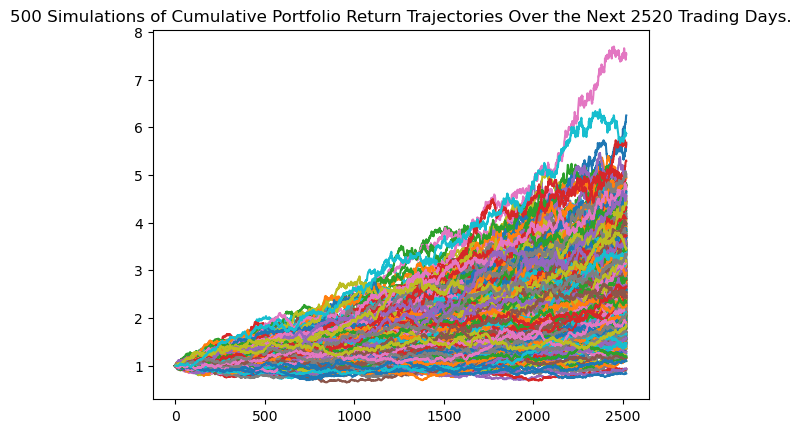

In [37]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

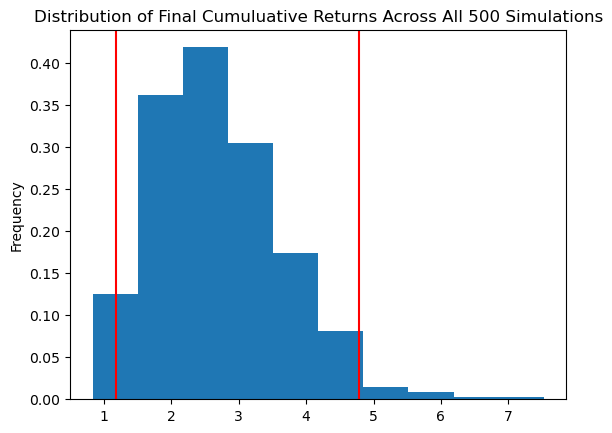

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.703118
std               0.957174
min               0.835880
25%               2.003444
50%               2.591908
75%               3.292566
max               7.525157
95% CI Lower      1.186261
95% CI Upper      4.779029
Name: 2520, dtype: float64


In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Set initial investment
initial_investment = 60000

# Calculate the lower and upper `95%` confidence intervals based on the initial investment
MC_tenyear_lower_ci = tbl[8] * initial_investment
MC_tenyear_upper_ci = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${round(MC_tenyear_lower_ci, 2)} and ${round(MC_tenyear_upper_ci, 2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71175.65 and $286741.72
